In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
churn = pd.read_csv('dataset_churn_modeling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# 분석에 필요하지 않은 변수 제거 
churn = churn.drop(['CustomerId','Surname','RowNumber'],axis=1)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 데이터 정보
- 총 데이터 수, column, row 수 파악
- 결측값 파악 
- 열의 변수타입 확인

In [4]:
churn # 데이터 확인

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# 데이터 총 수 : 10,000 
# 데이터 열 수 : 11

In [6]:
churn.isnull().sum() # 결측치 파악

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# 결측치 중 null값은 존재하지 않음

In [8]:
churn.dtypes # 데이터 타입 확인 ** Gender변수 타입을 int로 변경해도 되지않을까?

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# 데이터 타입별 요약
churn.describe(exclude='object') # 수치형

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# 데이터 타입별 요약
churn.describe(include='object') # 문자형

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


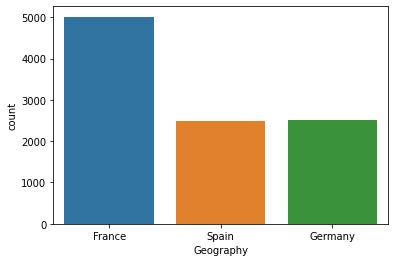

In [11]:
# 문자형 자료부터 간단한 시각화 
sns.countplot(x=churn['Geography'])

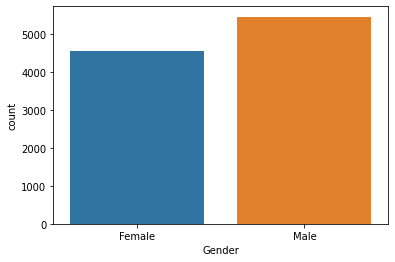

In [12]:
sns.countplot(x=churn['Gender'])

<Figure size 864x432 with 0 Axes>

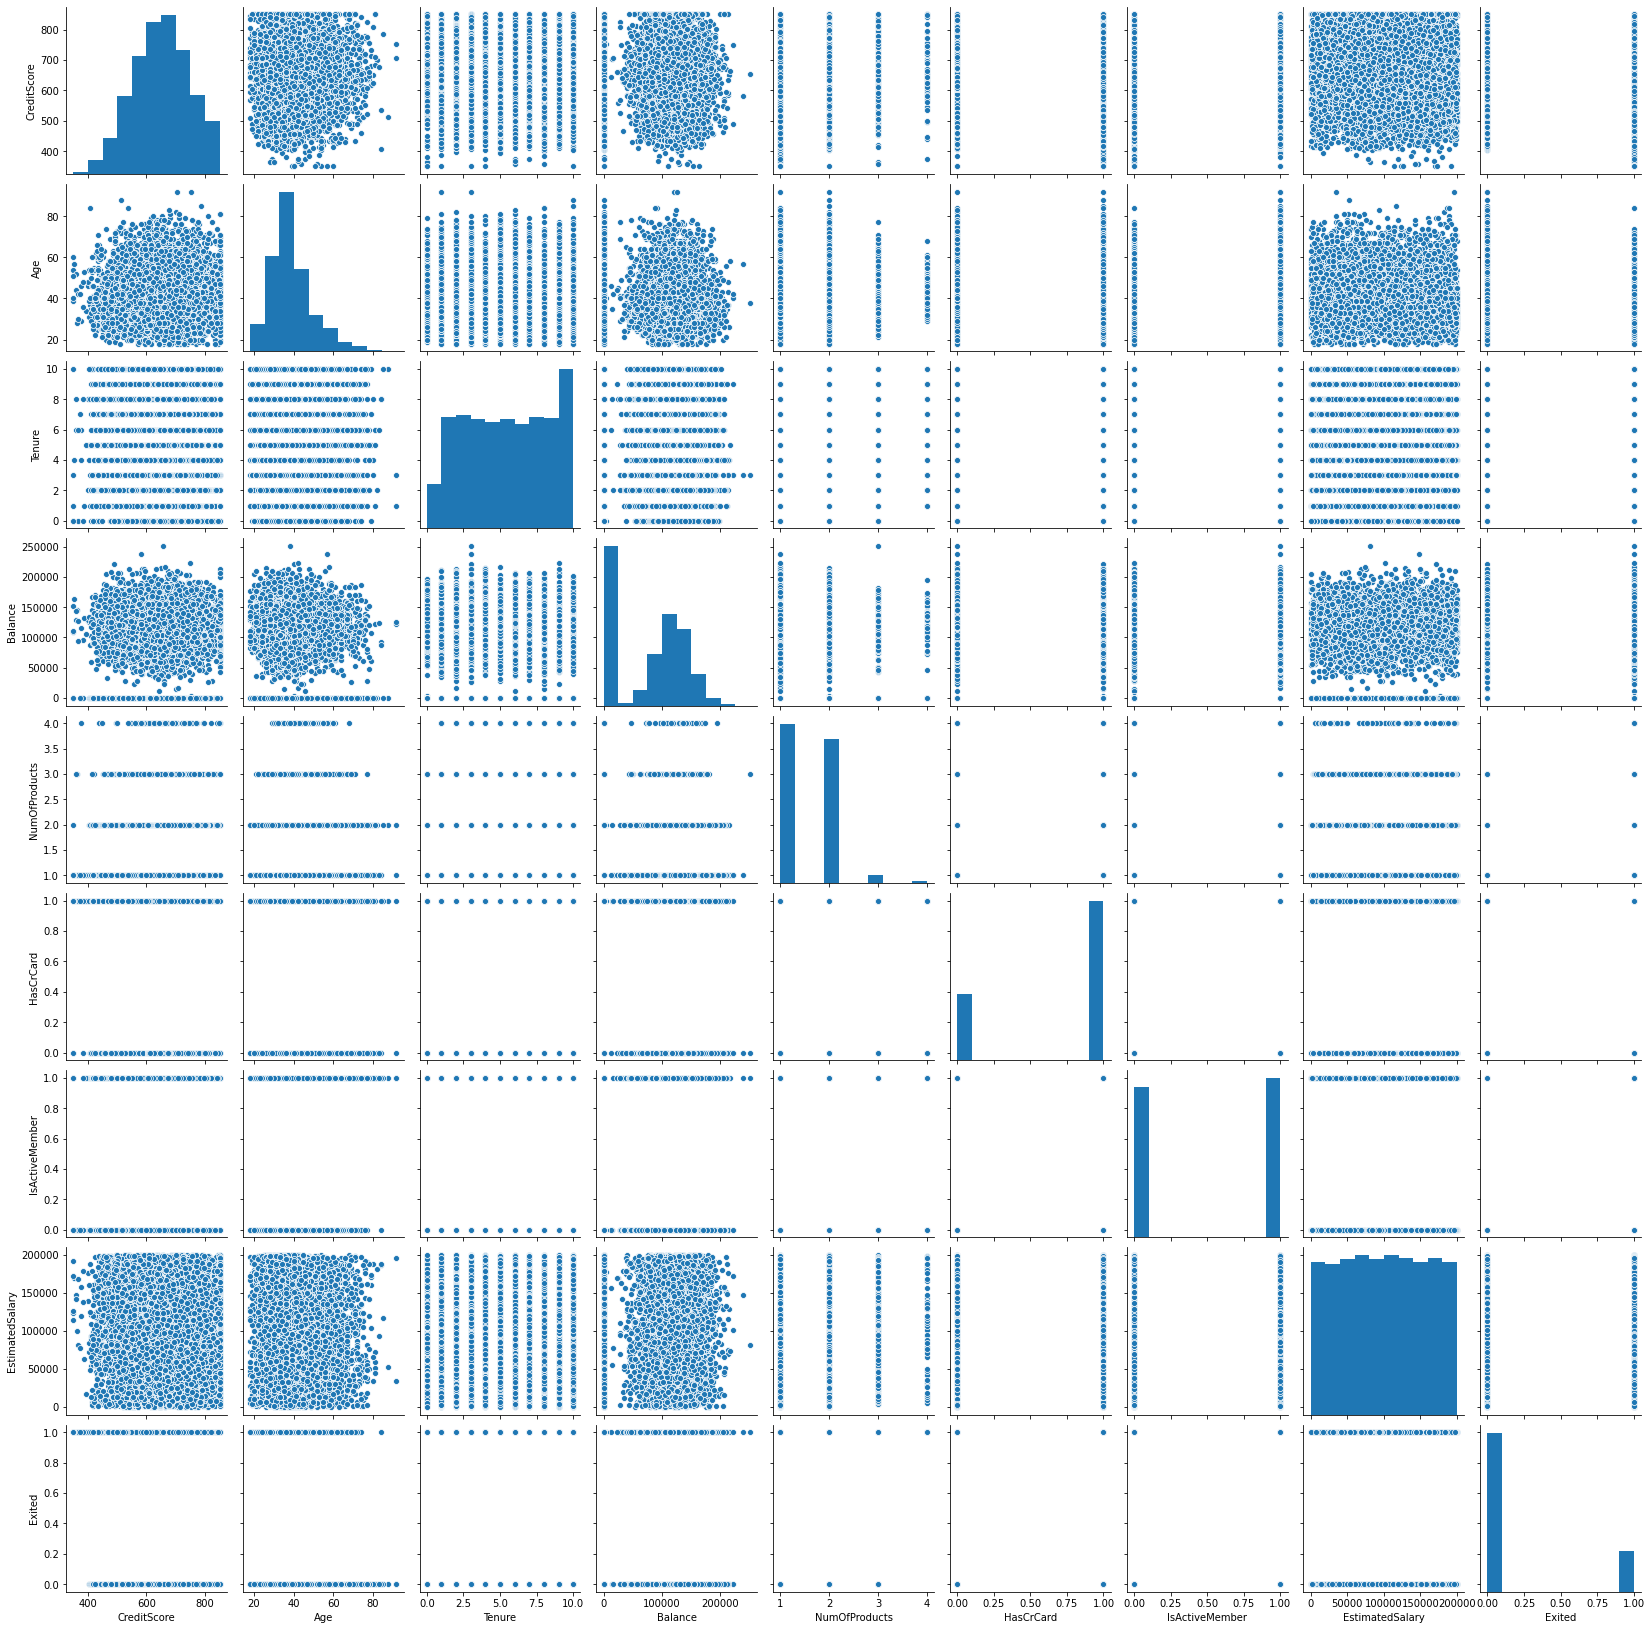

In [13]:
plt.figure(figsize=(12,6))
sns.pairplot(churn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36eadb8cc0>,
      dtype=object)

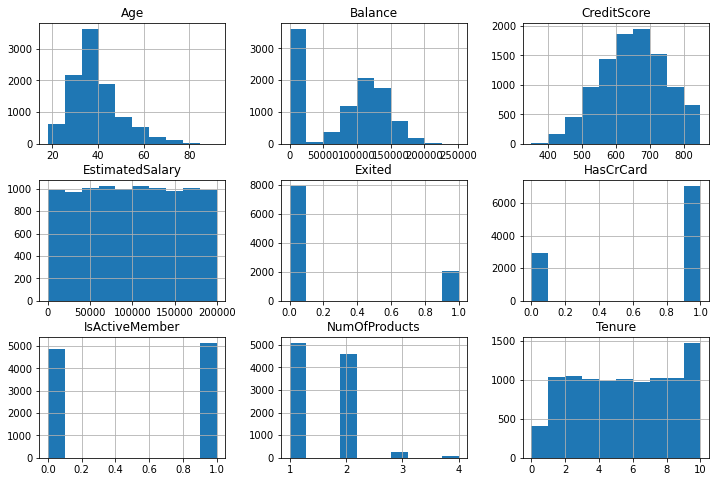

In [14]:
# 데이터 분포 확인 
churn.hist(figsize=(12,8))

Text(0.5, 1.0, 'comparison of credit score by gender')

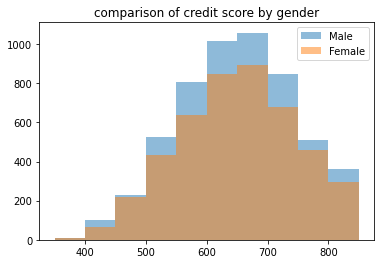

In [15]:
# 분포별 히스토그램 
# 성별에 따른 신용점수 분포 비교 
plt.hist(churn[churn['Gender']=='Male']['CreditScore'],label='Male',alpha=0.5)
plt.hist(churn[churn['Gender']=='Female']['CreditScore'],label='Female',alpha=0.5)
plt.legend()
plt.title('comparison of credit score by gender')

Text(0.5, 1.0, 'comparison of Estimated salary by gender')

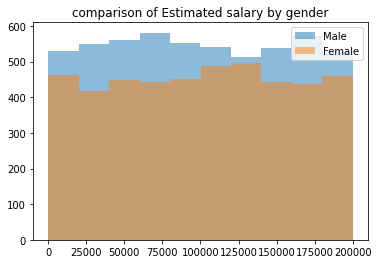

In [16]:
# 성별에 따른 연봉 분포 비교 
plt.hist(churn[churn['Gender']=='Male']['EstimatedSalary'],label='Male',alpha=0.5)
plt.hist(churn[churn['Gender']=='Female']['EstimatedSalary'],label='Female',alpha=0.5)
plt.legend()
plt.title('comparison of Estimated salary by gender')

Text(0.5, 1.0, 'comparison of tenure by gender')

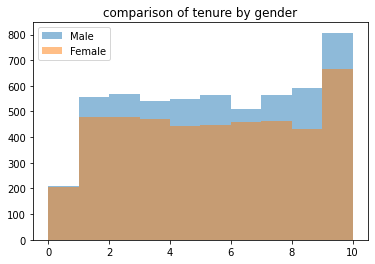

In [17]:
# 성별에 따른 고객유지기간 분포 비교 
plt.hist(churn[churn['Gender']=='Male']['Tenure'],label='Male',alpha=0.5)
plt.hist(churn[churn['Gender']=='Female']['Tenure'],label='Female',alpha=0.5)
plt.legend()
plt.title('comparison of tenure by gender')

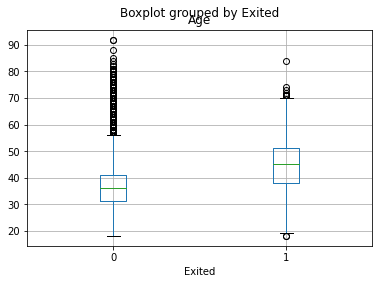

In [18]:
# 고객이탈여부 + 나이 
churn.boxplot(column='Age',by='Exited')

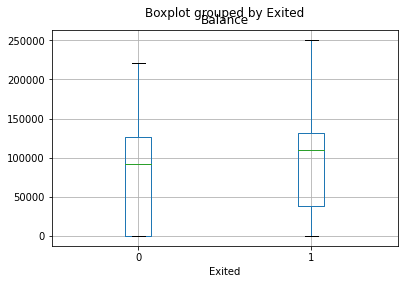

In [19]:
# 고객이탈여부 + 통장잔고
churn.boxplot(column='Balance',by='Exited')

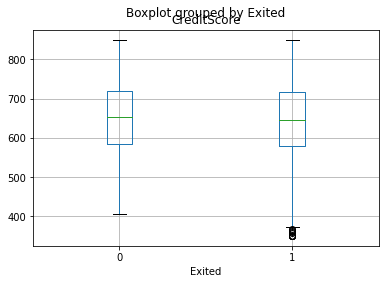

In [20]:
# 고객이탈여부 + 신용 점수
churn.boxplot(column='CreditScore',by='Exited')

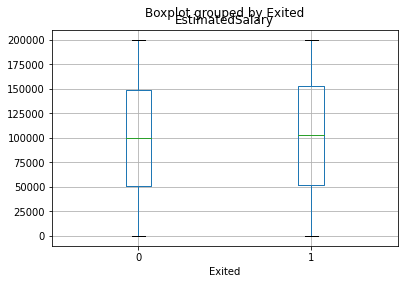

In [21]:
# 고객이탈여부 + 예측된 연봉
churn.boxplot(column='EstimatedSalary',by='Exited')

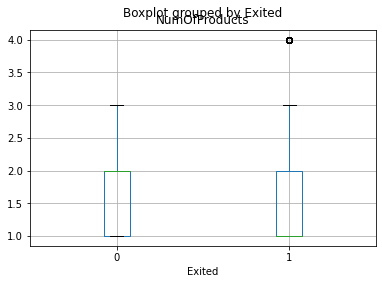

In [22]:
# 고객이탈여부 + 상품갯수
churn.boxplot(column='NumOfProducts',by='Exited')

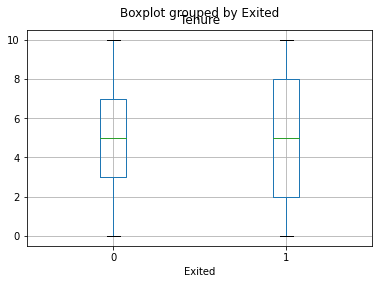

In [23]:
# 고객이탈여부 + Tenure
churn.boxplot(column='Tenure',by='Exited')

In [24]:
churn.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

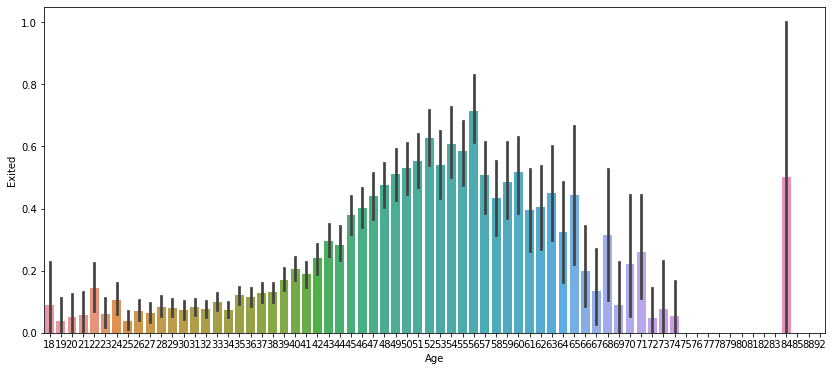

In [25]:
# 나이별 고객이탈건수의 막대그래프
plt.figure(figsize=(14,6))
sns.barplot(x='Age',y='Exited',data=churn)

In [26]:
# AgeGroup변수 생성 
churn['AgeGroup']=0
churn['AgeGroup']=pd.cut(churn.Age,bins=[0,10,20,30,40,50,60,70,80,90,100],labels=[0,10,20,30,40,50,60,70,80,90])
churn.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,30
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,30
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,30
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,40
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,20


In [27]:
churn[churn['Age']==92] # 레이블이 잘 되었는지 확인

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0,90
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0,90


In [28]:
# AgeGroup의 count
churn['AgeGroup'].value_counts().to_frame().style.background_gradient(cmap='summer')

,AgeGroup
30,4451
40,2320
20,1879
50,797
60,331
70,121
10,89
80,10
90,2
0,0


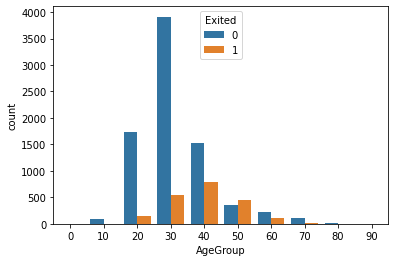

In [29]:
sns.countplot(x='AgeGroup',hue='Exited',data=churn)

In [30]:
churn['AgeGroup']=pd.to_numeric(churn['AgeGroup'])

In [31]:
churn['AgeGroup'].dtype

dtype('int64')

In [32]:
# calculate the percentage of Churn rate of 30's 
listed_Exited_30 = churn[churn['AgeGroup']==30]['Exited'].to_frame()
pct_Exited_30 = round(listed_Exited_30.groupby('Exited').size()/listed_Exited_30['Exited'].count(),2)
Exited_30 = pct_Exited_30.to_list()
# labeling Yes or No on customer churn
labels = ['No','Yes']

In [33]:
plt.colormaps() # color의 종류들을 확인 가능 

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


Text(0.5, 1.0, "The pie chart of rate of churn by 30's")

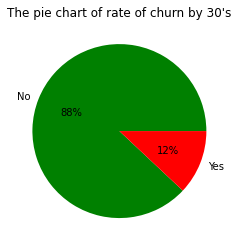

In [34]:
# 주요 고객층의 30대의 고객 이탈률을 원 그래프로 시각화 
plt.pie(Exited_30,labels=labels,autopct='%1.0f%%',colors='Greens')
plt.title("The pie chart of rate of churn by 30's")

In [35]:
# 나라별 나이대의 분포표 
churn['AgeGroup_title'] = churn['AgeGroup'].astype('str') + str('대')
churn['AgeGroup_title'].head()

0    40대
1    40대
2    40대
3    30대
4    40대
Name: AgeGroup_title, dtype: object

In [36]:
# 고객의 나이별 사는 곳의 비중 
cnt_Geo_Agr = churn.groupby('Geography')['AgeGroup_title'].count()
cnt_Geo_Agr

Geography
France     5014
Germany    2509
Spain      2477
Name: AgeGroup_title, dtype: int64

In [37]:
# 고객의 나이별 사는 곳의 비중을 나타낸 피벗 테이블 
pvot_tbl = churn.pivot_table(values='AgeGroup',index='Geography',columns='AgeGroup_title',aggfunc='count',fill_value=0)
pvot_tbl

AgeGroup_title,10대,20대,30대,40대,50대,60대,70대,80대,90대
Geography,,,,,,,,,
France,43,995,2311,1067,367,161,62,6,2
Germany,20,433,1022,678,243,80,30,3,0
Spain,26,451,1118,575,187,90,29,1,0


In [38]:
# 고객의 나이별 사는 곳의 지역별 비율 (단위 : %)
pvot_tbl_ = pvot_tbl.copy()
for x in pvot_tbl.index:
  pvot_tbl_origin = round(pvot_tbl[pvot_tbl.index == x ]/cnt_Geo_Agr[x]*100,1)
  pvot_tbl_ = pvot_tbl_.append(pvot_tbl_origin)
pvot_tbl_new = pvot_tbl_.tail(3)
pvot_tbl_new.style.background_gradient(cmap='YlGn',axis=1)

AgeGroup_title,10대,20대,30대,40대,50대,60대,70대,80대,90대
Geography,,,,,,,,,
France,0.900000,19.800000,46.100000,21.300000,7.300000,3.200000,1.200000,0.100000,0.000000
Germany,0.800000,17.300000,40.700000,27.000000,9.700000,3.200000,1.200000,0.100000,0.000000
Spain,1.000000,18.200000,45.100000,23.200000,7.500000,3.600000,1.200000,0.000000,0.000000


In [39]:
# 위의 피벗 테이블에 이탈여부를 추가
pvot_Exited = churn.pivot_table(values=['AgeGroup'], index=['Geography','Exited'],columns=['AgeGroup_title'],aggfunc='count',fill_value=0)
pvot_Exited_=pvot_Exited.copy()
pvot_Exited_

AgeGroup                                      
AgeGroup_title        10대  20대   30대  40대  50대  60대 70대 80대 90대
Geography Exited                                               
France    0            42  945  2091  767  174  119  59   5   2
          1             1   50   220  300  193   42   3   1   0
Germany   0            17  380   808  347   74   40  26   3   0
          1             3   53   214  331  169   40   4   0   0
Spain     0            25  411  1014  418  101   68  26   1   0
          1             1   40   104  157   86   22   3   0   0

In [40]:
# 프랑스 고객들의 나이별 이탈률 테이블 
round(pvot_Exited_.xs('France').xs('AgeGroup',axis=1)/cnt_Geo_Agr['France']*100,1)

AgeGroup_title,10대,20대,30대,40대,50대,60대,70대,80대,90대
Exited,,,,,,,,,
0,0.8,18.8,41.7,15.3,3.5,2.4,1.2,0.1,0.0
1,0.0,1.0,4.4,6.0,3.8,0.8,0.1,0.0,0.0


In [41]:
# 독일 고객들의 나이별 이탈률 테이블 
round(pvot_Exited_.xs('Germany').xs('AgeGroup',axis=1)/cnt_Geo_Agr['Germany']*100,1)

AgeGroup_title,10대,20대,30대,40대,50대,60대,70대,80대,90대
Exited,,,,,,,,,
0,0.7,15.1,32.2,13.8,2.9,1.6,1.0,0.1,0.0
1,0.1,2.1,8.5,13.2,6.7,1.6,0.2,0.0,0.0


In [42]:
# 스페인 고객들의 나이별 이탈률 테이블 
round(pvot_Exited_.xs('Spain').xs('AgeGroup',axis=1)/cnt_Geo_Agr['Spain']*100,1)

AgeGroup_title,10대,20대,30대,40대,50대,60대,70대,80대,90대
Exited,,,,,,,,,
0,1.0,16.6,40.9,16.9,4.1,2.7,1.0,0.0,0.0
1,0.0,1.6,4.2,6.3,3.5,0.9,0.1,0.0,0.0


In [43]:
print(round(3.8/(3.5+3.8)*100))
print(round(6.7/(2.9+6.7)*100))
print(round(3.5/(3.5+4.1)*100))

52
70
46


In [44]:
churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'AgeGroup', 'AgeGroup_title'],
      dtype='object')

In [45]:
# 파생변수 생성 
# Balance(통장잔고)가 있는지 없는지 여부 
def Is_Balance():
  churn['Is_balance'] = 0 
  for i in range(len(churn)):
    if churn['Balance'][i] == 0:
      churn['Is_balance'][i] = 0
    else:
      churn['Is_balance'][i] = 1

In [46]:
Is_Balance()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [47]:
# 파생변수 생성 
# CreditScore(신용점수)의 점수별 등급 
def class_CreditScore():
  churn['class_CrdtScore'] = 0 
  churn['class_CrdtScore'] = pd.cut(churn['CreditScore'],bins=[300,629,689,719,850],labels=['Bad','Fair','Good','Excellent'])
class_CreditScore()

In [48]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,AgeGroup_title,Is_balance,class_CrdtScore
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40,40대,0,Bad
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40,40대,1,Bad
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40,40대,1,Bad
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30,30대,0,Good
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40,40대,1,Excellent


In [49]:
churn.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
AgeGroup              int64
AgeGroup_title       object
Is_balance            int64
class_CrdtScore    category
dtype: object

In [50]:
# Logistic Regression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [51]:
# 데이터 분할 
df_train,df_test = train_test_split(churn,
                                    test_size = 0.3,
                                    random_state = 1234)
print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (7000, 15)
test data size : (3000, 15)


In [52]:
# 변수 HasCrCard/IsActiveMember는 범주형이므로 int -> object타입으로 변경
churn['HasCrCard'] = churn['HasCrCard'].astype('object') 
churn['IsActiveMember'] = churn['IsActiveMember'].astype('object') 
churn.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard            object
IsActiveMember       object
EstimatedSalary     float64
Exited                int64
AgeGroup              int64
AgeGroup_title       object
Is_balance            int64
class_CrdtScore    category
dtype: object

In [53]:
logistic_model = Logit.from_formula("""Exited ~ CreditScore + C(Geography) + C(Gender) + Age + Tenure + Balance + NumOfProducts + C(HasCrCard) + C(IsActiveMember) + EstimatedSalary """, churn)
# 적합 fitting 
log_result = logistic_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.1532
Time:                        16:06:09   Log-Likelihood:                -4280.7
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.3923      0.245    -13.857      0.000      -3.872   

In [54]:
# test 데이터 예측 
y_pred = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred>0.5).astype(int)
y_pred_class.head()

2374    0
1784    0
6301    1
1600    0
7920    0
dtype: int64

In [55]:
# 평가
# 실제 test데이터의 목표변수와 test데이터의 예측값 비교
print("Accuracy: {0:.3f}".format(accuracy_score(df_test["Exited"],y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["Exited"],y_pred_class)))

Accuracy: 0.812
Confusion Matrix: 
[[2308   88]
 [ 475  129]]


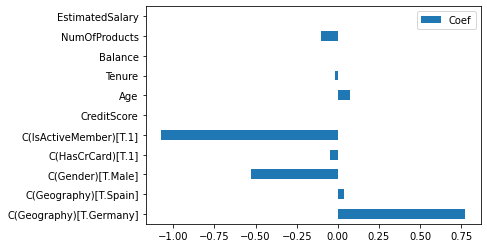

In [56]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]},index = logistic_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

In [57]:
churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'AgeGroup', 'AgeGroup_title', 'Is_balance',
       'class_CrdtScore'],
      dtype='object')

In [58]:
# 회귀분석에서 필요하지 않은 변수들 제거
logit_churn = churn.drop(['AgeGroup','AgeGroup_title','Is_balance','class_CrdtScore'],axis =1)
df_char = logit_churn.select_dtypes(include = 'object')
df_numeric = logit_churn.select_dtypes(exclude = 'object')

# 스케일링 
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled,columns = df_numeric.columns)

# 문자 + 숫자 데이터 
df_scaled = pd.concat([df_numeric_scaled, df_char],axis =1)
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography,Gender,HasCrCard,IsActiveMember
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1.977165,France,Female,1,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,-0.505775,Spain,Female,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1.977165,France,Female,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,-0.505775,France,Female,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,-0.505775,Spain,Female,1,1


In [59]:
# 종속변수 데이터를 다시 0과 1로 변환
df_scaled['Exited'] = np.where(df_scaled['Exited']>0, 1,0)
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography,Gender,HasCrCard,IsActiveMember
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,France,Female,1,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,Spain,Female,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,France,Female,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,France,Female,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,Spain,Female,1,1


In [60]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled,
                                                   test_size = 0.3,
                                                   random_state =1234)

In [61]:
# 표준화 회귀 모형 
scaled_log_model = Logit.from_formula("""Exited ~ CreditScore + C(Geography) + C(Gender) + Age + Tenure + Balance + NumOfProducts + C(HasCrCard) + C(IsActiveMember) + EstimatedSalary""",df_scaled_train )
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.427300
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.1570
Time:                        16:06:09   Log-Likelihood:                -2991.1
converged:                       True   LL-Null:                       -3548.1
Covariance Type:            nonrobust   LLR p-value:                5.570e-232
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.9939      0.081    -12.231      0.000      -1.153   

In [62]:
# test 데이터 예측 
y_pred = log_result.predict(df_scaled_test)
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred>0.5).astype(int)
y_pred_class.head()

2374    0
1784    0
6301    0
1600    0
7920    0
dtype: int64

In [63]:
# 평가
# 실제 test데이터의 목표변수와 test데이터의 예측값 비교
print("Accuracy: {0:.3f}".format(accuracy_score(df_scaled_test["Exited"],y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_scaled_test["Exited"],y_pred_class)))

Accuracy: 0.799
Confusion Matrix: 
[[2396    0]
 [ 604    0]]


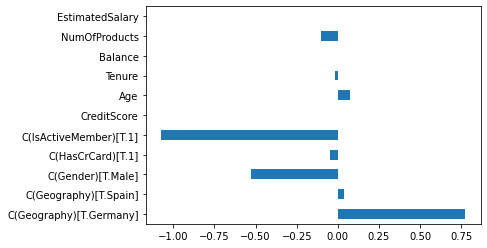

In [64]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({'Coef' : scaled_log_result.params.values[1:]},
                                  index = scaled_log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef',legend = False)

In [65]:
logit_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
# 범주형변수들은 더미화 
# 로지스틱 회귀분석 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [67]:
# 더미화
# drop_first하는 이유는 일종의 공선성을 해결하는 방법 중 하나임 
dummies = pd.get_dummies(logit_churn,drop_first=True)
dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1


In [68]:
# 데이터 분할 
X = dummies.drop('Exited',axis = 1)
y = dummies['Exited']
dum_x_train, dum_x_test, dum_y_train, dum_y_test = train_test_split(X, y, test_size = 0.3)

# 로지스틱 함수 적합 
Logistic_model = LogisticRegression(random_state=1234)
Logistic_result = Logistic_model.fit(dum_x_train,dum_y_train)

# 적합 결과 
Logistic_model.coef_
Logistic_model.intercept_

# 예측 
Logistic_model.predict(dum_x_test)
Logistic_model.predict_proba(dum_x_test)
predicted = Logistic_model.predict(dum_x_test)
pd.Series(predicted).value_counts()
score = Logistic_model.score(dum_x_test, dum_y_test)
print(score)

# confusion matrix 
metrics.confusion_matrix(dum_y_test, predicted)

0.791


array([[2341,   51],
       [ 576,   32]])

In [69]:
dum_x_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_1', 'IsActiveMember_1'],
      dtype='object')

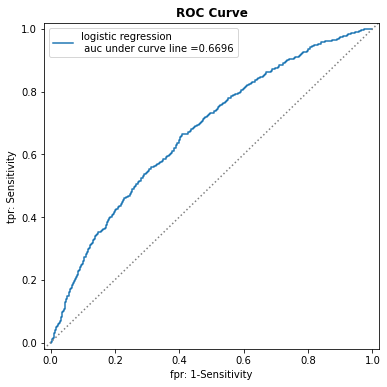

In [70]:
# 모형 평가 ROC 
# 모델에 의한 예측 확률 계산
proba = Logistic_model.predict_proba(dum_x_test)[::,1]

# fpr : 1-특이도, tpr : 민감도 , auc 계산
fpr, tpr, _ = metrics.roc_curve(y_true = dum_y_test, y_score = proba)
auc = metrics.roc_auc_score(dum_y_test, proba)

# ROC 그래프 생성 
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label = 'logistic regression \n auc under curve line ='+"%.4f"%auc)
plt.plot([-0.02,1.02],[-0.02,1.02],color='gray',linestyle = ':')
plt.margins(0)
plt.legend(loc=4)
plt.xlabel('fpr: 1-Sensitivity')
plt.ylabel('tpr: Sensitivity')
plt.title('ROC Curve', weight = 'bold')
plt.legend()
plt.show()

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

In [72]:
# 다중공선성 확인 (Variance Inflation Factor) 
df_x = dummies.drop('Exited',axis =1 )
df_x_const = add_constant(df_x)
# 데이터프레임으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
6,EstimatedSalary,1.001
1,CreditScore,1.001
10,HasCrCard_1,1.002
3,Tenure,1.002
9,Gender_Male,1.003
11,IsActiveMember_1,1.011
2,Age,1.012
5,NumOfProducts,1.122
8,Geography_Spain,1.125
4,Balance,1.336


# 분류 - Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [74]:
churn_dropped = churn.drop(['Is_balance','AgeGroup','class_CrdtScore','AgeGroup_title'],axis =1)

In [75]:
dt = DecisionTreeClassifier(random_state = 1234)
dt_dummies = pd.get_dummies(churn_dropped)
X = dt_dummies.drop('Exited',axis = 1)
y = dt_dummies['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [76]:
from sklearn.tree import export_graphviz

export_graphviz(dt,out_file = 'tree.dot',impurity = True, filled = True)

In [77]:
import graphviz 

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [78]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
  tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state =1234)
  tree.fit(X_train,y_train)
  train_accuracy.append(tree.score(X_train,y_train))
  test_accuracy.append(tree.score(X_test,y_test))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

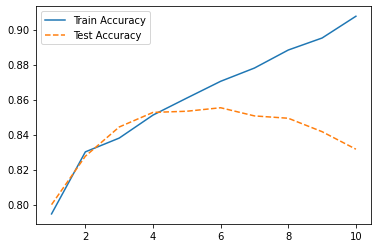

In [79]:
df_accuracy_depth.round(3)

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--',label = 'Test Accuracy')
plt.legend()

In [80]:
tree_final = DecisionTreeClassifier(max_depth = 5, random_state=1234)
tree_final.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

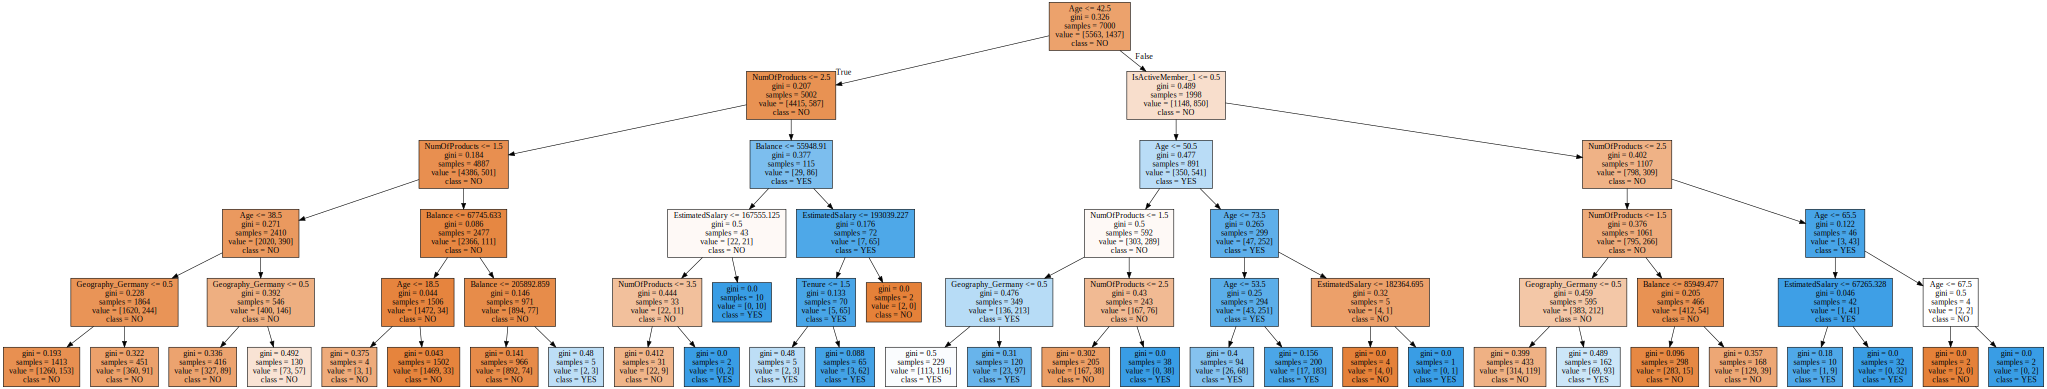

In [81]:
export_graphviz(tree_final, out_file ='tree_final.dot', class_names=['NO','YES'],
                feature_names = X_train.columns, impurity = True, filled = True)
with open('tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [82]:
y_pred = tree_final.predict(X_test)
print('Train Accuracy:{0:.3f}'.format(tree_final.score(X_train,y_train)))
print('Test Accuracy:{0:.3f}'.format(tree_final.score(X_test,y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

Train Accuracy:0.861
Test Accuracy:0.853
Confusion matrix:
[[2269  131]
 [ 309  291]]


In [83]:
df_importance = pd.DataFrame()
df_importance['Feature'] = X_train.columns
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance',ascending = False, inplace = True)
df_importance[:10].round(3)

,Feature,Importance
1,Age,0.431
4,NumOfProducts,0.331
14,IsActiveMember_1,0.131
7,Geography_Germany,0.063
3,Balance,0.028
5,EstimatedSalary,0.015
2,Tenure,0.001
0,CreditScore,0.000
6,Geography_France,0.000
8,Geography_Spain,0.000


Text(0, 0.5, '설명변수')

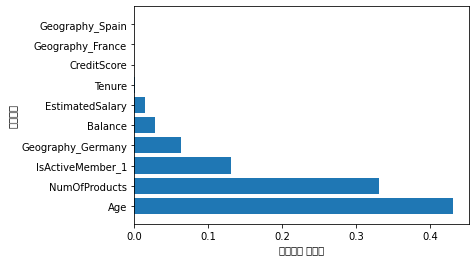

In [84]:
# df_importance[:10].sort_values('Importance',ascending = True, inplace = True)
coordinates = range(10)
plt.barh(y=coordinates,width = df_importance['Importance'][:10])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [86]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train,y_train)
print('Accuracy on training set:{:.3f}'.format(rf.score(X_train,y_train)))
print('Accuracy on test set:{:.3f}'.format(rf.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.864


In [87]:
train_accuracy = []
test_accuracy = []
para_n_tree = [n_tree*10 for n_tree in range(1,15)]

for v_n_estimators in para_n_tree:
  rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state =1234)
  rf.fit(X_train,y_train)
  train_accuracy.append(rf.score(X_train,y_train))
  test_accuracy.append(rf.score(X_test,y_test ))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

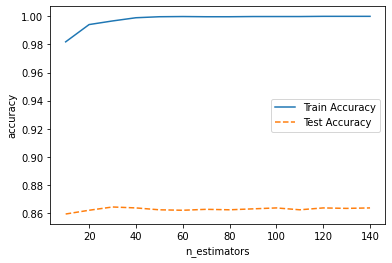

In [88]:
df_accuracy_n.round(3)

plt.plot(para_n_tree,train_accuracy, linestyle ='-',label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--',label = 'Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

In [89]:
oob_error = []
for v_n_estimators in range(1,151):
  rf = RandomForestClassifier(n_estimators = v_n_estimators, oob_score = True, random_state =1234)
  rf.fit(X_train,y_train)
  oob_error.append(1-rf.oob_score_)

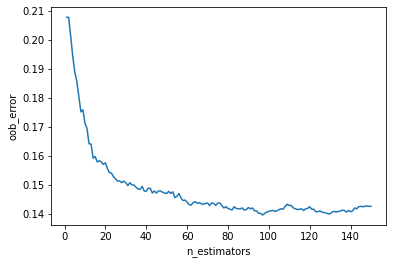

In [90]:
plt.plot(range(1,151),oob_error)
plt.ylabel('oob_error')
plt.xlabel('n_estimators')
n_estimators =100

In [91]:
train_accuracy = []
test_accuracy = []
para_depth = [depth*10 for depth in range(1,11)]

for v_max_depth in para_depth:
  rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 50, random_state =1234)
  rf.fit(X_train,y_train)
  train_accuracy.append(rf.score(X_train,y_train))
  test_accuracy.append(rf.score(X_test,y_test ))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

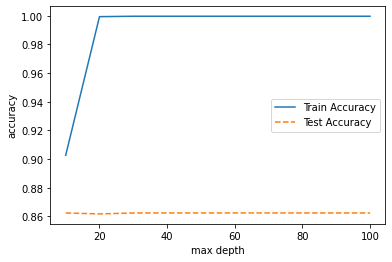

In [92]:
df_accuracy_depth.round(3)

plt.plot(para_depth,train_accuracy, linestyle ='-',label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--',label = 'Test Accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()

In [93]:
train_accuracy = []
test_accuracy = []
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
  rf = RandomForestClassifier(min_samples_split = v_min_samples_split,max_depth=10, n_estimators = 50, random_state =1234)
  rf.fit(X_train,y_train)
  train_accuracy.append(rf.score(X_train,y_train))
  test_accuracy.append(rf.score(X_test,y_test ))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

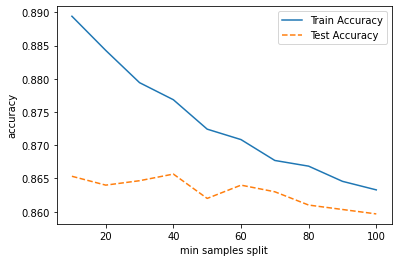

In [94]:
df_accuracy_split.round(3)

plt.plot(para_split,train_accuracy, linestyle ='-',label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--',label = 'Test Accuracy')
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.legend()

In [95]:
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
  rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split = 100,max_depth=10, n_estimators = 50, random_state =1234)
  rf.fit(X_train,y_train)
  train_accuracy.append(rf.score(X_train,y_train))
  test_accuracy.append(rf.score(X_test,y_test ))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

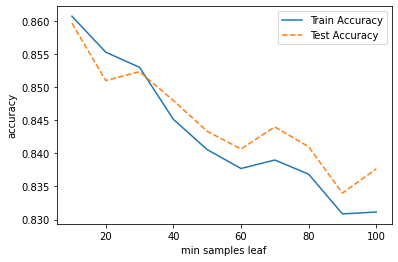

In [96]:
df_accuracy_leaf.round(3)

plt.plot(para_split,train_accuracy, linestyle ='-',label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--',label = 'Test Accuracy')
plt.xlabel('min samples leaf')
plt.ylabel('accuracy')
plt.legend()

In [97]:
rf_final = RandomForestClassifier(min_samples_leaf = 30,min_samples_split = 100,max_depth=10, n_estimators = 50, random_state =1234)
rf_final.fit(X_train,y_train)
y_pred = rf_final.predict(X_test)
print('Accuracy on training set:{:.3f}'.format(rf_final.score(X_train,y_train)))
print('Accuracy on test set:{:.3f}'.format(rf_final.score(X_test,y_test)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test,y_pred)))

Accuracy on training set:0.853
Accuracy on test set:0.852
Confusion matrix: 
[[2349   51]
 [ 392  208]]


In [98]:
v_feature_name = X_train.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,Age,0.432
4,NumOfProducts,0.219
3,Balance,0.069
14,IsActiveMember_1,0.056
13,IsActiveMember_0,0.051
7,Geography_Germany,0.044
5,EstimatedSalary,0.027
0,CreditScore,0.023
6,Geography_France,0.021
9,Gender_Female,0.017


([<matplotlib.axis.YTick at 0x7f36d83710b8>,
 [Text(0, 0, 'HasCrCard_1'),
  Text(0, 0, 'HasCrCard_0'),
  Text(0, 0, 'Geography_Spain'),
  Text(0, 0, 'Gender_Male'),
  Text(0, 0, 'Tenure'),
  Text(0, 0, 'Gender_Female'),
  Text(0, 0, 'Geography_France'),
  Text(0, 0, 'CreditScore'),
  Text(0, 0, 'EstimatedSalary'),
  Text(0, 0, 'Geography_Germany'),
  Text(0, 0, 'IsActiveMember_0'),
  Text(0, 0, 'IsActiveMember_1'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'NumOfProducts'),
  Text(0, 0, 'Age')])

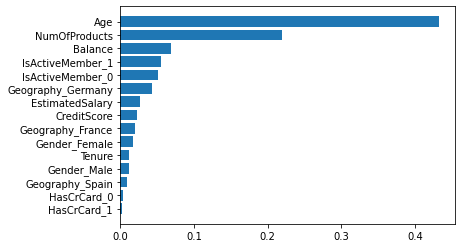

In [99]:
df_importance.sort_values('Importance',ascending=True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])

In [100]:
estimator = RandomForestClassifier(n_estimators=50, random_state =1234)
param_grid = {'max_depth':para_depth,
              'min_samples_leaf':para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring= 'accuracy', n_jobs =-1)
grid_rf.fit(X_train,y_train)
print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
print('\n best score:\n{}'.format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

best parameter:
{'max_depth': 20, 'min_samples_leaf': 10}

 best score:
0.857


In [101]:
rf_final = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)
rf_final.fit(X_train,y_train)
y_pred = rf_final.predict(X_test)
print('Accuracy on training set:{:.3f}'.format(rf_final.score(X_train,y_train)))
print('Accuracy on test set:{:.3f}'.format(rf_final.score(X_test,y_test)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test,y_pred)))

Accuracy on training set:0.875
Accuracy on test set:0.860
Confusion matrix: 
[[2330   70]
 [ 351  249]]


In [102]:
v_feature_name = X_train.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,Age,0.381
4,NumOfProducts,0.192
3,Balance,0.092
0,CreditScore,0.062
5,EstimatedSalary,0.055
13,IsActiveMember_0,0.045
14,IsActiveMember_1,0.040
7,Geography_Germany,0.036
2,Tenure,0.034
6,Geography_France,0.014


([<matplotlib.axis.YTick at 0x7f36d82c14a8>,
 [Text(0, 0, 'HasCrCard_1'),
  Text(0, 0, 'HasCrCard_0'),
  Text(0, 0, 'Geography_Spain'),
  Text(0, 0, 'Gender_Female'),
  Text(0, 0, 'Gender_Male'),
  Text(0, 0, 'Geography_France'),
  Text(0, 0, 'Tenure'),
  Text(0, 0, 'Geography_Germany'),
  Text(0, 0, 'IsActiveMember_1'),
  Text(0, 0, 'IsActiveMember_0'),
  Text(0, 0, 'EstimatedSalary'),
  Text(0, 0, 'CreditScore'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'NumOfProducts'),
  Text(0, 0, 'Age')])

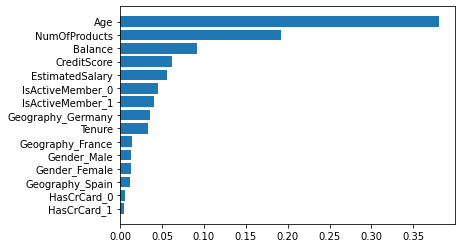

In [103]:
df_importance.sort_values('Importance',ascending=True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])

In [104]:
# GBM 
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state =1234)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간:{0:.4f}초'.format(time.time()-start_time))

GBM 정확도: 0.8650
GBM 수행 시간:0.9948초


In [105]:
from sklearn.model_selection import GridSearchCV

params = {
  'n_estimators' : [100,500],
  'learning_rate' : [0.05,0.3],
  'max_depth' : [1,10]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 3 , verbose =1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.2min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 500}
최고 예측 정확도 : 0.8570


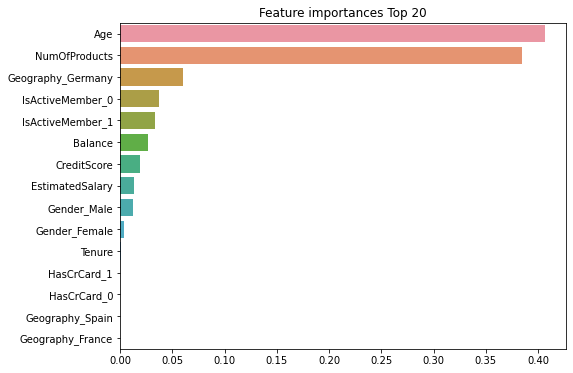

In [106]:
best_gb_clf = grid_cv.best_estimator_
gb_importances_values = best_gb_clf.feature_importances_
gb_importances = pd.Series(gb_importances_values, index =X_train.columns)
gb_top20 = gb_importances.sort_values(ascending =False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=gb_top20, y=gb_top20.index)
plt.show()

In [107]:
import xgboost as xgb 
from xgboost import plot_importance
import numpy as np

dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

In [108]:
params = {'max_depth' : 12,
          'eta' : 0.05, 
          'objective' : 'binary:logistic',
          'eval_metric' : 'logloss',
          'early_stoppings' : 200
          }
num_rounds = 500

In [109]:
wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round= num_rounds,
                      early_stopping_rounds = 200, evals = wlist)

[0]	train-logloss:0.66067	eval-logloss:0.66533
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 200 rounds.
[1]	train-logloss:0.631212	eval-logloss:0.640202
[2]	train-logloss:0.604284	eval-logloss:0.617467
[3]	train-logloss:0.57942	eval-logloss:0.596909
[4]	train-logloss:0.55667	eval-logloss:0.578081
[5]	train-logloss:0.535387	eval-logloss:0.560814
[6]	train-logloss:0.515903	eval-logloss:0.544992
[7]	train-logloss:0.497511	eval-logloss:0.530113
[8]	train-logloss:0.480407	eval-logloss:0.51641
[9]	train-logloss:0.464655	eval-logloss:0.503882
[10]	train-logloss:0.449515	eval-logloss:0.492414
[11]	train-logloss:0.435167	eval-logloss:0.482056
[12]	train-logloss:0.421721	eval-logloss:0.472424
[13]	train-logloss:0.40892	eval-logloss:0.463463
[14]	train-logloss:0.397016	eval-logloss:0.455104
[15]	train-logloss:0.38567	eval-logloss:0.447602
[16]	train-logloss:0.375109	eval-logloss:0.440778
[17]	train-loglos

In [110]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.222 0.868 0.309 0.008 0.029 0.053 0.372 0.854 0.049 0.031]
예측값 10개만 표시: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0]


In [111]:
def get_clf_eval(y_test, pred=None, pred_proba = None):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}'.format(accuracy))

In [112]:
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[2265  135]
 [ 303  297]]
정확도 : 0.8540


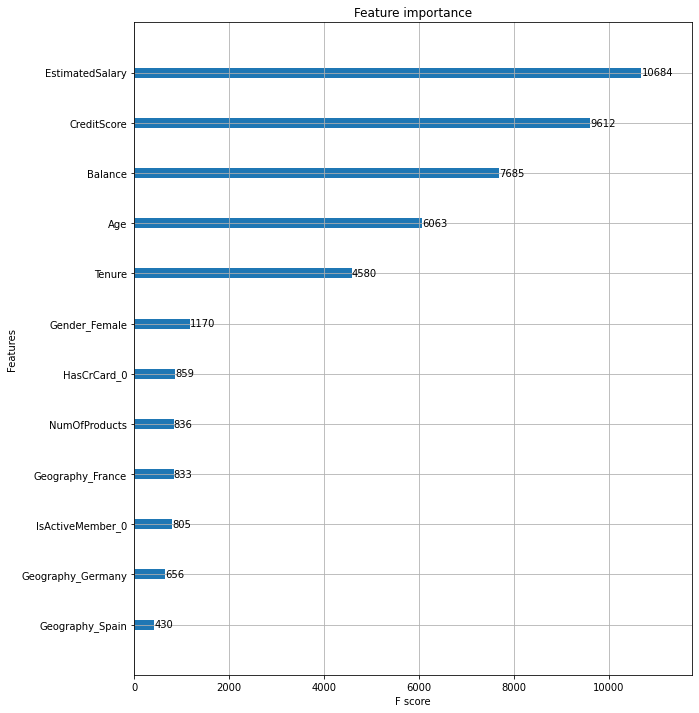

In [113]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [114]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators = 400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds =100, eval_metric = 'logloss', eval_set = evals, verbose =True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.467884	valid_0's binary_logloss: 0.467884
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.44495	valid_0's binary_logloss: 0.44495
[3]	valid_0's binary_logloss: 0.427725	valid_0's binary_logloss: 0.427725
[4]	valid_0's binary_logloss: 0.414244	valid_0's binary_logloss: 0.414244
[5]	valid_0's binary_logloss: 0.402448	valid_0's binary_logloss: 0.402448
[6]	valid_0's binary_logloss: 0.393583	valid_0's binary_logloss: 0.393583
[7]	valid_0's binary_logloss: 0.38554	valid_0's binary_logloss: 0.38554
[8]	valid_0's binary_logloss: 0.378824	valid_0's binary_logloss: 0.378824
[9]	valid_0's binary_logloss: 0.373246	valid_0's binary_logloss: 0.373246
[10]	valid_0's binary_logloss: 0.368022	valid_0's binary_logloss: 0.368022
[11]	valid_0's binary_logloss: 0.363804	valid_0's binary_logloss: 0.363804
[12]	valid_0's binary_logloss: 0.360228	valid_0's binary_logloss: 0.360228
[13]	valid_0's binary_logloss: 0.357033	valid_0's 

In [115]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[2294  106]
 [ 311  289]]
정확도 : 0.8610


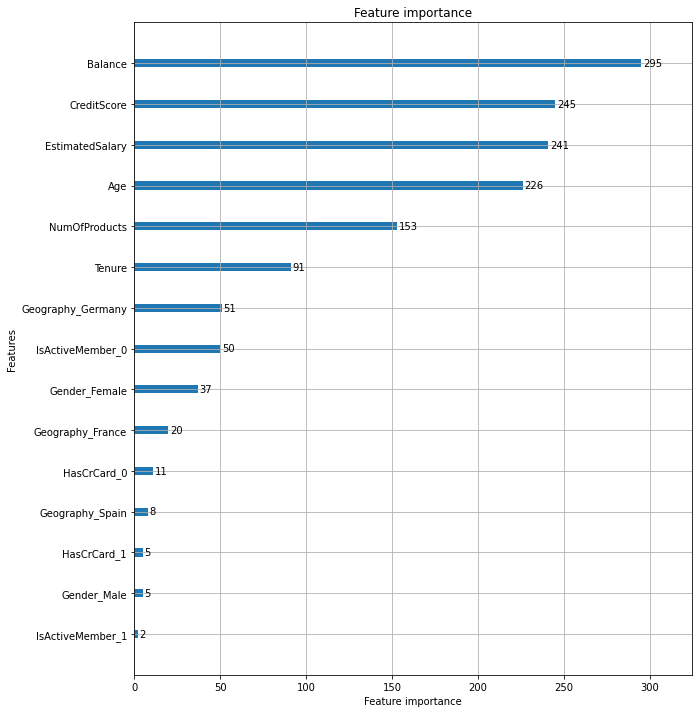

In [116]:
from lightgbm import plot_importance
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax= ax)